In [1]:
import torch
import numpy as np
from torch.utils.data import DataLoader
from qm9.data.dataset_class import ProcessedDataset
from qm9.data.prepare import prepare_dataset
from qm9.data.utils import _get_species

/opt/conda/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


ModuleNotFoundError: No module named 'qm9.data'; 'qm9' is not a package

In [ ]:
datafiles = prepare_dataset(datadir="/home/gongjingjing/tmp/data",
                            dataset='qm9',
                            subset=None,
                            splits=None,
                            force_download=False)

datasets = {}
for split, datafile in datafiles.items():
    with np.load(datafile) as f:
        datasets[split] = {
            key: val
            for key, val in f.items()
        }

keys = [list(data.keys()) for data in datasets.values()]
assert all([key == keys[0]
            for key in keys]), 'Datasets must have same set of keys!'

In [ ]:
datasets["train"]["positions"][0][:5]

array([[-1.2698136e-02,  1.0858041e+00,  8.0009960e-03],
       [ 2.1504159e-03, -6.0313176e-03,  1.9761203e-03],
       [ 1.0117308e+00,  1.4637512e+00,  2.7657481e-04],
       [-5.4081506e-01,  1.4475266e+00, -8.7664372e-01],
       [-5.2381361e-01,  1.4379326e+00,  9.0639728e-01]], dtype=float32)

In [ ]:
print(datasets["train"]['charges'][:2])
for k in datasets["train"]:
    print(k, datasets["train"][k].shape)

[[6 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [7 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
num_atoms (100000,)
charges (100000, 29)
positions (100000, 29, 3)
index (100000,)
A (100000,)
B (100000,)
C (100000,)
mu (100000,)
alpha (100000,)
homo (100000,)
lumo (100000,)
gap (100000,)
r2 (100000,)
zpve (100000,)
U0 (100000,)
U (100000,)
H (100000,)
G (100000,)
Cv (100000,)
omega1 (100000,)
zpve_thermo (100000,)
U0_thermo (100000,)
U_thermo (100000,)
H_thermo (100000,)
G_thermo (100000,)
Cv_thermo (100000,)


In [ ]:
make_ajacency_matrix(5)

/tmp/ipykernel_1786773/3508418254.py:7: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  row = torch.range(0, n_nodes-1, dtype=torch.long).reshape(1, -1, 1).repeat(1, 1, n_nodes)
/tmp/ipykernel_1786773/3508418254.py:8: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  col = torch.range(0, n_nodes-1, dtype=torch.long).reshape(1, 1, -1).repeat(1, n_nodes, 1)


tensor([[0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4],
        [1, 2, 3, 4, 0, 2, 3, 4, 0, 1, 3, 4, 0, 1, 2, 4, 0, 1, 2, 3]])

In [ ]:
from torch_geometric.datasets import QM9
from torch_geometric.data import Data
from torch_geometric.data import Batch
from torch_geometric.data import DataLoader
from torch_geometric.data.separate import separate
import torch

def make_adjacency_matrix(n_nodes):
    row = torch.arange(0, n_nodes, dtype=torch.long).reshape(1, -1, 1).repeat(1, 1, n_nodes)
    col = torch.arange(0, n_nodes, dtype=torch.long).reshape(1, 1, -1).repeat(1, n_nodes, 1)
    full_adj = torch.concat([row, col], dim=0).reshape(2, -1)
    diag_bool = torch.eye(n_nodes, dtype=torch.bool).reshape(-1)
    return full_adj[:, ~diag_bool]

def transform(data):
    data.x = data.x[:, :6]
    data.edge_index = make_adjacency_matrix(data.x.shape[0])
    data.edge_attr = None
    data.zx = torch.randn_like(data.x)
    data.zpos = torch.randn_like(data.pos)
    data.y = None
    data.z = None
    return data

ds = QM9(root="/home/gongjingjing/tmp/data/qm9", transform=transform)

/opt/conda/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
_ds = DataLoader(ds, batch_size=2, shuffle=True)
for _i, _d in enumerate(_ds):
    if _i > 4:
        break
    # separate(_d)
    print(_d)
    print(_d._slice_dict)
    print(_d._inc_dict)
    print(_d.ptr)
    # print(_d.name)

DataBatch(x=[33, 6], edge_index=[2, 512], pos=[33, 3], idx=[2], name=[2], zx=[33, 6], zpos=[33, 3], batch=[33], ptr=[3])
defaultdict(<class 'dict'>, {'x': tensor([ 0, 17, 33]), 'edge_index': tensor([  0, 272, 512]), 'pos': tensor([ 0, 17, 33]), 'idx': tensor([0, 1, 2]), 'name': tensor([0, 1, 2]), 'zx': tensor([ 0, 17, 33]), 'zpos': tensor([ 0, 17, 33])})
defaultdict(<class 'dict'>, {'x': tensor([0, 0]), 'edge_index': tensor([ 0, 17]), 'pos': tensor([0, 0]), 'idx': tensor([0, 0]), 'name': None, 'zx': tensor([0, 0]), 'zpos': tensor([0, 0])})
tensor([ 0, 17, 33])
DataBatch(x=[36, 6], edge_index=[2, 630], pos=[36, 3], idx=[2], name=[2], zx=[36, 6], zpos=[36, 3], batch=[36], ptr=[3])
defaultdict(<class 'dict'>, {'x': tensor([ 0, 15, 36]), 'edge_index': tensor([  0, 210, 630]), 'pos': tensor([ 0, 15, 36]), 'idx': tensor([0, 1, 2]), 'name': tensor([0, 1, 2]), 'zx': tensor([ 0, 15, 36]), 'zpos': tensor([ 0, 15, 36])})
defaultdict(<class 'dict'>, {'x': tensor([0, 0]), 'edge_index': tensor([ 0, 

/home/gongjingjing/.local/lib/python3.8/site-packages/torch_geometric/deprecation.py:22: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


In [ ]:
import torch
ch = torch.arange(20).reshape(4, 5)
torch.split(ch, [2, 3], dim=-1)

(tensor([[ 0,  1],
         [ 5,  6],
         [10, 11],
         [15, 16]]),
 tensor([[ 2,  3,  4],
         [ 7,  8,  9],
         [12, 13, 14],
         [17, 18, 19]]))

In [ ]:
datasets["train"]["charges"].shape

torch.Size([100000, 29])

In [ ]:
17*16+(44-17)*(44-17-1)

974

In [ ]:
from typing import Any


class A:
    def __init__(self):
        self.data = {"a":1, "b":2, "c":3}
    def __get__(self, attr: str) -> Any:
        return self.data[attr]
    
aa = A()

In [ ]:
aa.d=4
print(aa.__dict__)

{'data': {'a': 1, 'b': 2, 'c': 3}, 'd': 4}


In [ ]:
from typing import Any


class Dummy(object):
    def __init__(self) -> None:
        self.data = {"a":1, "b":2, "c":3}
    def __getattr__(self, attr):
        return self.__getattribute__("data")[attr]
    def __setattr__(self, __name: str, __value: Any) -> None:
        self.value = __value
d = Dummy()
d.value = "Python"

RecursionError: maximum recursion depth exceeded

In [ ]:
print(d.value)

value


In [ ]:
aastr="asd:-f"
aastr.partition(":-")

('asd', ':-', 'f')

ValueError: invalid literal for int() with base 10: '0.1'

In [ ]:
def convert_to_type(value):
    try:
        int_value = int(value)
        return int_value
    except ValueError:
        try:
            float_value = float(value)
            return float_value
        except ValueError:
            if value.lower() == 'true':
                return True
            elif value.lower() == 'false':
                return False
            else:
                return value

In [ ]:
def convert_to_type(value):
    try:
        int_value = int(value)
        return int_value
    except ValueError:
        try:
            float_value = float(value)
            return float_value
        except ValueError:
            if value.lower() == 'true':
                return True
            elif value.lower() == 'false':
                return False
            else:
                return value

In [ ]:
import numpy as np
np.random.choice(10, p=np.ones(10)/10, replace=False)

8

In [ ]:
n_nodes_map = {
        22: 3393,
        17: 13025,
        23: 4848,
        21: 9970,
        19: 13832,
        20: 9482,
        16: 10644,
        13: 3060,
        15: 7796,
        25: 1506,
        18: 13364,
        12: 1689,
        11: 807,
        24: 539,
        14: 5136,
        26: 48,
        7: 16,
        10: 362,
        8: 49,
        9: 124,
        27: 266,
        4: 4,
        29: 25,
        6: 9,
        5: 5,
        3: 1
    }

In [ ]:
histogram = np.zeros(max(n_nodes_map.keys())+1, dtype=np.int)
for i in range(max(n_nodes_map.keys())):
    if i not in n_nodes_map:
        n_nodes_map[i] = 0 
    else:
        histogram[i] = n_nodes_map[i]

/tmp/ipykernel_559267/1803203869.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  histogram = np.zeros(max(n_nodes_map.keys())+1, dtype=np.int)


In [ ]:
print(histogram)

[    0     0     0     1     4     5     9    16    49   124   362   807
  1689  3060  5136  7796 10644 13025 13364 13832  9482  9970  3393  4848
   539  1506    48   266     0     0]


In [ ]:
histogram

array([    0,     0,     0,     1,     4,     5,     9,    16,    49,
         124,   362,   807,  1689,  3060,  5136,  7796, 10644, 13025,
       13364, 13832,  9482,  9970,  3393,  4848,   539,  1506,    48,
         266,     0,     0])

In [ ]:
import streamlit as st
from rdkit import Chem
from rdkit.Chem import Draw
from PIL import Image

compound_smiles = 'c1cc(C(=O)O)c(OC(=O)C)cc1'
m = Chem.MolFromSmiles(compound_smiles)
im=Draw.MolToImage(m)

st.image(im)

ImportError: libXrender.so.1: cannot open shared object file: No such file or directory

In [ ]:
import numpy as np
import torch
from typing import List, Tuple, Union, Dict, Any
from torch_geometric.data import Data
target_keys = [
            "mu",
            "alpha",
            "homo",
            "lumo",
            "gap",
            "r2",
            "zpve",
            "U0",
            "U",
            "H",
            "G",
            "Cv",
            "U0_thermo",
            "U_thermo",
            "H_thermo",
            "G_thermo",
            "A",
            "B",
            "C",
        ]
index2charge = torch.tensor([1, 6, 7, 8, 9])

def _make_data_instance(_index:torch.Tensor, _num_atoms:torch.Tensor, _charges:torch.Tensor, _positions:torch.Tensor, _targets:torch.Tensor):
    '''
    Args:
        _index: scalar
        _num_atoms: scalar
        _charges : [K]
        _positions: [K, 3]
        _targets: [19]
    '''
    _charges, _positions = _charges[:_num_atoms], _positions[:_num_atoms, :]
    _type_onehot = (_charges.reshape(-1, 1) == index2charge.reshape(1, -1)).to(torch.float32)
    _charges = _charges.reshape(-1, 1).to(torch.float32)
    _x = torch.concat([_type_onehot, _charges], dim=-1)
    return Data(x=_x, pos=_positions, y=_targets, idx=_index.reshape(-1))


def _load_datalist_from_npz(path: str) -> List[Data]:
    _data_dict = np.load(path)
    targets = torch.concat(
        [
            torch.tensor(_data_dict[k], dtype=torch.float32).reshape(-1, 1)
            for k in target_keys
        ],
        dim=-1,
    )
    index = torch.tensor(_data_dict["index"], dtype=torch.int64)
    num_atoms = torch.tensor(_data_dict["num_atoms"], dtype=torch.int32)
    charges = torch.tensor(_data_dict["charges"], dtype=torch.int32)  # [N, K]
    positions = torch.tensor(
        _data_dict["positions"], dtype=torch.float32
    )  # [N, K, 3]
    assert torch.all(torch.sum(charges != 0, dim=1) == num_atoms)
    assert torch.all(
        torch.any(torch.sum(positions != 0, dim=1) == torch.reshape(num_atoms, [-1, 1]), dim=1)
    )
    datalist = []
    for i in range(index.shape[0]):
        datalist.append(_make_data_instance(index[i], num_atoms[i], charges[i], positions[i], targets[i]))
    return datalist


/opt/conda/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
dlist = _load_datalist_from_npz("/home/gongjingjing/tmp/data/qm9/train.npz")
dlist[:10]

[Data(x=[5, 6], y=[19], pos=[5, 3], idx=[1]),
 Data(x=[4, 6], y=[19], pos=[4, 3], idx=[1]),
 Data(x=[4, 6], y=[19], pos=[4, 3], idx=[1]),
 Data(x=[3, 6], y=[19], pos=[3, 3], idx=[1]),
 Data(x=[4, 6], y=[19], pos=[4, 3], idx=[1]),
 Data(x=[8, 6], y=[19], pos=[8, 3], idx=[1]),
 Data(x=[6, 6], y=[19], pos=[6, 3], idx=[1]),
 Data(x=[7, 6], y=[19], pos=[7, 3], idx=[1]),
 Data(x=[6, 6], y=[19], pos=[6, 3], idx=[1]),
 Data(x=[6, 6], y=[19], pos=[6, 3], idx=[1])]

In [ ]:
for d in dlist[:10]:
    print(d.idx, d.x)

tensor([1]) tensor([[0., 1., 0., 0., 0., 6.],
        [1., 0., 0., 0., 0., 1.],
        [1., 0., 0., 0., 0., 1.],
        [1., 0., 0., 0., 0., 1.],
        [1., 0., 0., 0., 0., 1.]])
tensor([2]) tensor([[0., 0., 1., 0., 0., 7.],
        [1., 0., 0., 0., 0., 1.],
        [1., 0., 0., 0., 0., 1.],
        [1., 0., 0., 0., 0., 1.]])
tensor([4]) tensor([[0., 1., 0., 0., 0., 6.],
        [0., 1., 0., 0., 0., 6.],
        [1., 0., 0., 0., 0., 1.],
        [1., 0., 0., 0., 0., 1.]])
tensor([5]) tensor([[0., 1., 0., 0., 0., 6.],
        [0., 0., 1., 0., 0., 7.],
        [1., 0., 0., 0., 0., 1.]])
tensor([6]) tensor([[0., 1., 0., 0., 0., 6.],
        [0., 0., 0., 1., 0., 8.],
        [1., 0., 0., 0., 0., 1.],
        [1., 0., 0., 0., 0., 1.]])
tensor([7]) tensor([[0., 1., 0., 0., 0., 6.],
        [0., 1., 0., 0., 0., 6.],
        [1., 0., 0., 0., 0., 1.],
        [1., 0., 0., 0., 0., 1.],
        [1., 0., 0., 0., 0., 1.],
        [1., 0., 0., 0., 0., 1.],
        [1., 0., 0., 0., 0., 1.],
     

In [ ]:
import io
buff = io.BytesIO()
print(buff)

/opt/conda/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


datadir is: /home/gongjj/project/data/qm9


/opt/conda/lib/python3.8/site-packages/torch_geometric/deprecation.py:22: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


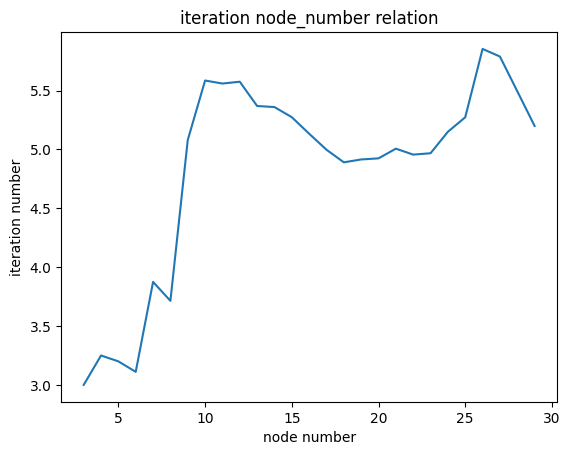

In [1]:
import sys
sys.path.append("../..")
import core.data.origin_rotation_icp as oricp
import core.data.qm9_gen as qm9_gen
from core.data.prefetch import PrefetchLoader
from absl import logging
import torch
from collections import Counter, defaultdict
import matplotlib.pyplot as plt
import pickle

def plot_data(data, title='iteration atom_number relation', xlabel='atom number', ylabel='iteration number'):
    x = [x for x, _ in data]
    y = [y for _, y in data]
    plt.plot(x, y)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()
    plt.close()

def average(x:Counter):
    return sum([k*v for k,v in x.items()])/sum(x.values())

if __name__ == "__main__":
    logging.set_verbosity(logging.DEBUG)
    cfg = {"datadir": "/home/gongjj/project/data/qm9", "batch_size": 1}
    ds = PrefetchLoader(
        qm9_gen.QM9Gen(
            cfg["datadir"],
            cfg["batch_size"],
            num_workers=4,
            persistent_workers=True,
            prefetch_factor=4,
        ),
        device=torch.device("cpu"),
    )
    cntr = defaultdict(Counter)
    for idx, d in enumerate(ds):
        _, A_rotated, _, iter_count = oricp.icp(
            d.pos.numpy(), d.zpos.numpy(), max_iterations=50
        )
        cntr[d.pos.shape[0]][iter_count] += 1
        # if idx > 10000:
        #     break
    with open('/home/gongjj/project/tmp/qm9_cntr.pkl', 'wb') as f:
        pickle.dump(cntr, f)
    plot_data(sorted([(k,average(v)) for k,v in cntr.items()],key=lambda x:x[0]), 
            title='iteration node_number relation', xlabel='node number', ylabel='iteration number')

In [2]:
import sys
sys.path.append("../..")
import core.data.origin_rotation_icp as oricp
import core.data.qm9_gen as qm9_gen
from core.data.prefetch import PrefetchLoader
from absl import logging
import torch
from collections import Counter, defaultdict
import matplotlib.pyplot as plt
import numpy as np
import pickle

def plot_data(data, title='iteration atom_number relation', xlabel='atom number', ylabel='iteration number'):
    x = [x for x, _ in data]
    y = [y for _, y in data]
    plt.plot(x, y)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()
    plt.close()

def average(x:Counter):
    return sum([k*v for k,v in x.items()])/sum(x.values())

if __name__ == "__main__":
    cntr = defaultdict(Counter)
    for idx in range(1000000):
        num_nodes = np.random.randint(5, 200)
        _, A_rotated, _, iter_count = oricp.icp(
            np.random.randn(num_nodes,3)*1.38, 
            np.random.randn(num_nodes,3), max_iterations=50
        )
        cntr[num_nodes][iter_count] += 1
    # save cntr
    with open('/home/gongjj/project/tmp/cntr.pkl', 'wb') as f:
        pickle.dump(cntr, f)
    plot_data(sorted([(k,average(v)) for k,v in cntr.items()],key=lambda x:x[0]), 
            title='iteration node_number relation', xlabel='node number', ylabel='iteration number')

NameError: name 'cntr' is not defined

In [4]:
import sys
sys.path.append("../..")
import core.data.origin_rotation_icp as oricp
import core.data.qm9_gen as qm9_gen
from core.data.prefetch import PrefetchLoader
from absl import logging
import torch
from collections import Counter, defaultdict
import matplotlib.pyplot as plt

def plot_data(data, title='iteration atom_number relation', xlabel='atom number', ylabel='iteration number'):
    x = [x for x, _ in data]
    y = [y for _, y in data]
    plt.plot(x, y)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()
    plt.close()

def average(x:Counter):
    return sum([k*v for k,v in x.items()])/sum(x.values())

if __name__ == "__main__":
    logging.set_verbosity(logging.DEBUG)
    cfg = {"datadir": "/home/gongjj/project/data/qm9", "batch_size": 1}
    ds = PrefetchLoader(
        qm9_gen.QM9Gen(
            cfg["datadir"],
            cfg["batch_size"],
            num_workers=4,
            persistent_workers=True,
            prefetch_factor=4,
        ),
        device=torch.device("cpu"),
    )
    collect = []
    for idx, d in enumerate(ds):
        if idx > 1000:
            break
        collect.extend(d.pos.numpy().reshape(-1).tolist())


datadir is: /home/gongjj/project/data/qm9


/opt/conda/lib/python3.8/site-packages/torch_geometric/deprecation.py:22: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


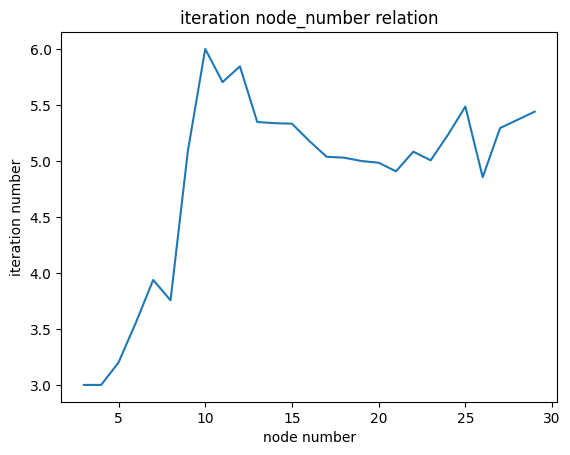

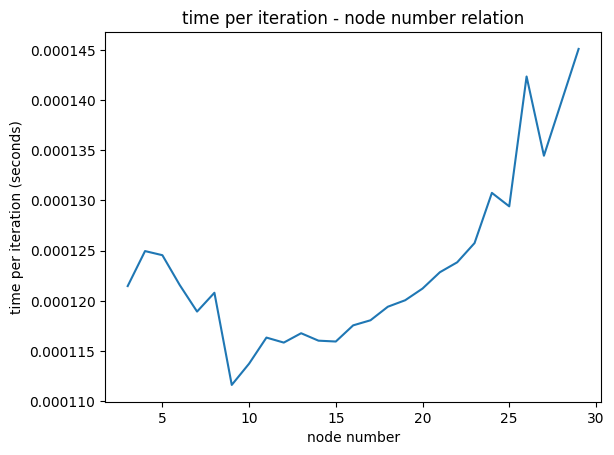

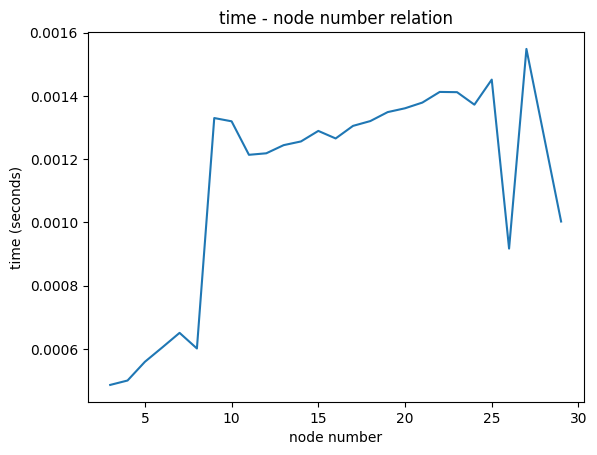

In [18]:
import sys
sys.path.append("../..")
import core.data.origin_rotation_icp as oricp
import core.data.qm9_gen as qm9_gen
from core.data.prefetch import PrefetchLoader
from absl import logging
import torch
from collections import Counter, defaultdict
import matplotlib.pyplot as plt
import pickle
import numpy as np

def plot_data(data, title='iteration atom_number relation', xlabel='atom number', ylabel='iteration number'):
    x = [x for x, _ in data]
    y = [y for _, y in data]
    plt.plot(x, y)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()
    plt.close()

def average(x:Counter):
    return sum([k*v for k,v in x.items()])/sum(x.values())

def average_time_per_iter(x:Counter, time_cntr:Counter):
    return np.mean([time_cntr[k]/((k+1)*v) for k,v in x.items()])

def average_time(x:Counter, time_cntr:Counter):
    return np.mean([time_cntr[k]/v for k,v in x.items()])

if __name__ == "__main__":
    with open('/home/gongjj/project/tmp/qm9_cntr.pkl', 'rb') as f:
        cntr = pickle.load(f)
    with open('/home/gongjj/project/tmp/qm9_time_cntr.pkl', 'rb') as f:
        time_cntr = pickle.load(f)
    plot_data(sorted([(k,average(v)) for k,v in cntr.items()],key=lambda x:x[0]), 
            title='iteration node_number relation', xlabel='node number', ylabel='iteration number')

    plot_data(sorted([(k,average_time_per_iter(cntr[k], v)) for k,v in time_cntr.items()],key=lambda x:x[0]), 
            title='time per iteration - node number relation', xlabel='node number', ylabel='time per iteration (seconds)')
    plot_data(sorted([(k,average_time(cntr[k], v)) for k,v in time_cntr.items()],key=lambda x:x[0]), 
        title='time - node number relation', xlabel='node number', ylabel='time (seconds)')

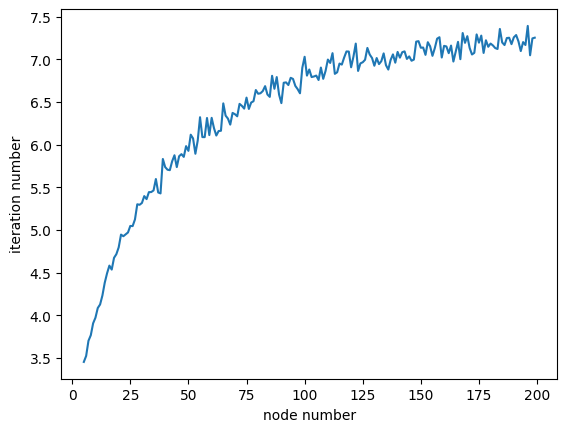

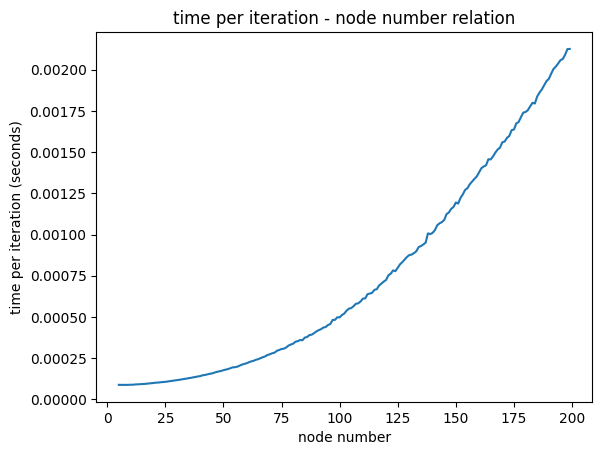

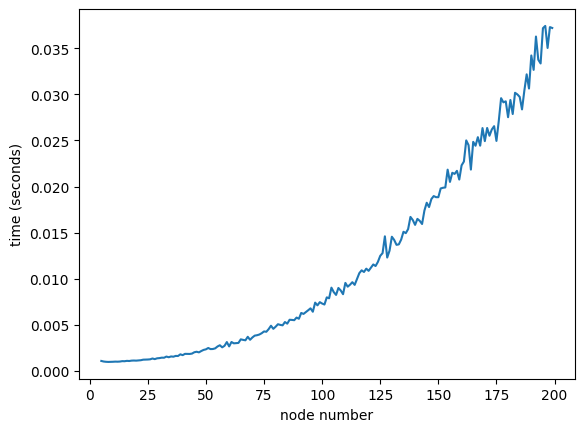

In [9]:
import sys
sys.path.append("../..")
import core.data.origin_rotation_icp as oricp
import core.data.qm9_gen as qm9_gen
from core.data.prefetch import PrefetchLoader
from absl import logging
import torch
from collections import Counter, defaultdict
import matplotlib.pyplot as plt
import pickle
import numpy as np

def plot_data(data, title='iteration atom_number relation', xlabel='atom number', ylabel='iteration number'):
    x = [x for x, _ in data]
    y = [y for _, y in data]
    plt.plot(x, y)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()
    plt.close()

def average(x:Counter):
    return sum([k*v for k,v in x.items()])/sum(x.values())

def average_time_per_iter(x:Counter, time_cntr:Counter):
    return np.mean([time_cntr[k]/((k+1)*v) for k,v in x.items()])

def average_time(x:Counter, time_cntr:Counter):
    return np.mean([time_cntr[k]/v for k,v in x.items()])

if __name__ == "__main__":
    with open('/home/gongjj/project/tmp/sim_cntr.pkl', 'rb') as f:
        cntr = pickle.load(f)
    with open('/home/gongjj/project/tmp/sim_time_cntr.pkl', 'rb') as f:
        time_cntr = pickle.load(f)
    node_num2iter_num = sorted([(k,average(v)) for k,v in cntr.items()],key=lambda x:x[0])
    plot_data(node_num2iter_num, 
            title=None, xlabel='node number', ylabel='iteration number')

    plot_data(sorted([(k,average_time_per_iter(cntr[k], v)) for k,v in time_cntr.items()],key=lambda x:x[0]), 
            title='time per iteration - node number relation', xlabel='node number', ylabel='time per iteration (seconds)')
    node_num2time = sorted([(k,average_time(cntr[k], v)) for k,v in time_cntr.items()],key=lambda x:x[0])
    plot_data(node_num2time, 
        title=None, xlabel='node number', ylabel='time (seconds)')

In [5]:
print(dict(node_num2iter_num)[150])
print(dict(node_num2time)[150])

7.135586559245431
0.01884175491585451


In [6]:
cntrs = {3: 1, 4: 3, 5: 9, 6: 2, 7: 8, 8: 23, 9: 23, 10: 50, 11: 109, 12: 168, 13: 280, 14: 402, 15: 583, 16: 597,
                17: 949, 18: 1284, 19: 1862, 20: 2674, 21: 3599, 22: 6109, 23: 8693, 24: 13604, 25: 17419, 26: 25672,
                27: 31647, 28: 43809, 29: 56697, 30: 70400, 31: 82655, 32: 104100, 33: 122776, 34: 140834, 35: 164888,
                36: 185451, 37: 194541, 38: 218549, 39: 231232, 40: 243300, 41: 253349, 42: 268341, 43: 272081,
                44: 276917, 45: 276839, 46: 274747, 47: 272126, 48: 262709, 49: 250157, 50: 244781, 51: 228898,
                52: 215338, 53: 203728, 54: 191697, 55: 180518, 56: 163843, 57: 152055, 58: 136536, 59: 120393,
                60: 107292, 61: 94635, 62: 83179, 63: 68384, 64: 61517, 65: 48867, 66: 37685, 67: 32859, 68: 27367,
                69: 20981, 70: 18699, 71: 14791, 72: 11921, 73: 9933, 74: 9037, 75: 6538, 76: 6374, 77: 4036, 78: 4189,
                79: 3842, 80: 3277, 81: 2925, 82: 1843, 83: 2060, 84: 1394, 85: 1514, 86: 1357, 87: 1346, 88: 999,
                89: 300, 90: 390, 91: 510, 92: 510, 93: 240, 94: 721, 95: 360, 96: 360, 97: 390, 98: 330, 99: 540,
                100: 258, 101: 210, 102: 60, 103: 180, 104: 206, 105: 60, 106: 390, 107: 180, 108: 180, 109: 150,
                110: 120, 111: 360, 112: 120, 113: 210, 114: 60, 115: 30, 116: 210, 117: 270, 118: 450, 119: 240,
                120: 228, 121: 120, 122: 30, 123: 420, 124: 240, 125: 210, 126: 158, 127: 180, 128: 60, 129: 30,
                130: 120, 131: 30, 132: 120, 133: 60, 134: 240, 135: 169, 136: 240, 137: 30, 138: 270, 139: 180,
                140: 270, 141: 150, 142: 60, 143: 60, 144: 240, 145: 180, 146: 150, 147: 150, 148: 90, 149: 90,
                151: 30, 152: 60, 155: 90, 159: 30, 160: 60, 165: 30, 171: 30, 175: 30, 176: 60, 181: 30}

cnt = 0
num_sample = 0
for k, v in cntrs.items():
    cnt+=k*v
    num_sample+=v
print(cnt/num_sample)
    

46.64165788854804


In [5]:

cntrs = {22: 3393, 17: 13025, 23: 4848, 21: 9970, 19: 13832, 20: 9482, 16: 10644, 13: 3060,
                15: 7796, 25: 1506, 18: 13364, 12: 1689, 11: 807, 24: 539, 14: 5136, 26: 48, 7: 16, 10: 362,
                8: 49, 9: 124, 27: 266, 4: 4, 29: 25, 6: 9, 5: 5, 3: 1}

cnt = 0
num_sample = 0
for k, v in cntrs.items():
    cnt+=k*v
    num_sample+=v
print(cnt/num_sample)
    

18.03097


In [9]:
(48/18)**2

7.111111111111111

In [10]:
98*7


686

In [11]:
(0.0025/0.002)*10

12.5

In [6]:
150/47

3.1914893617021276

In [7]:
18.84/2

9.42